## Lab Exercises 

* [CUT] Newman 8.2 - The Lotka-Volterra equations 
* [CUT] Newman 8.3 - The Lorenz equations
* Newman 8.4 - The non-linear pendulum
* Newman 8.5 - The driven pendulum

*The cuts are chosen so we don't need to work with coupled equations yet.  Instead we will focus on the pendulum problem.  Keep those additional problems in mind for a Final Project.*

Do Newman's Exercises 8.4 and 8.5 in a lab format.  This means your work needs to begin with a introduction to the problem.  Explain the basic physics as in Example 8.6 (choose your own words).  Explain the graphs clearly.

Do these in a separate notebook so it can be graded separately from Weekly Session 9.

In order to solve Newman 8.4-8.5, you will need to solve a system of coupled ODE's one way, or another.  Here is my code to do so

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
%matplotlib inline

In [2]:
def solve_coupled(f,n,r0,interval,steps,*args,order=1):
    """ Solve system of coupled ODEs by Euler or Runge-Kutta methods,
    with fixed number of steps.

    f: vector function giving ODE as r'=f(t,r)
       Should return numpy array, so array arithmetic works.
       Note opposite argument order to Newman.
       We put independent variable first.
    n: number of spatial dimensions (i.e., dependent variables)
    r0: vector initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta) 
    
    Returns points (t,r1,...,rn), as (steps+1)x(n+1) numpy array.
    """

    # set up solution mesh
    # points will be indexed 0..steps
    (a,b) = interval  # endpoints
    h = (b-a)/steps  # step size
    points = np.zeros((steps+1,n+1))

    # set up initial point
    t = a    # current point t value
    r = r0   # current point r value
    points[0,0] = t
    points[0,1:] = r
    ## # alternatively:
    ## for i in range(n):
    ##     points[0,i+1] = r[i]

    for i in range(1,steps+1):

        # evaluate new point
        t_new = t + h
        if (order == 1):
            # Euler
            r_new = r + h * f(t,r,*args)
        elif (order == 2):
            # second-order Runge-Kutta
            # Newman (8.13)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            r_new = r + k2
        elif (order == 4):
            # fourth-order Runge-Kutta
            # Newman (8.17)
            k1 = h * f(t,r,*args)
            k2 = h * f(t+1/2*h,r+1/2*k1,*args)
            k3 = h * f(t+1/2*h,r+1/2*k2,*args)
            k4 = h * f(t+h,r+k3,*args)
            r_new = r + 1/6*(k1+2*k2+2*k3+k4)

        # save new point
        (t,r) = (t_new,r_new)
        points[i,0] = t
        points[i,1:] = r

    return points

In [3]:
################################################################
# repeat as 1-dim vector to test vector machinery
################################################################
def f_Newman_8_7_vec(t,r):
    (x,) = r
    r_prime = [-x**3+np.sin(t)]
    #print ("t {}, x {}, rp {}".format(t,x,r_prime))
    return np.array(r_prime)

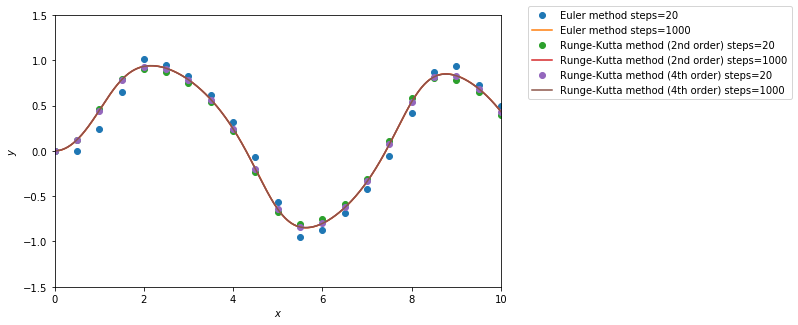

In [4]:
interval = (0.,10.)
r0 = [0.]

#set up plot
#plot the step size vs. error
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

#more efficient way to do this
i=0
        
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_xlim(*interval)
ax.set_ylim(-1.5,1.5)


for order in [1,2,4]:
    # obtain solutions with different step sizes
    for steps in [20,1000]:  # Newman used [10,20,50,100]
        
        results = []    # to hold results with different step sizes

        solution = solve_coupled(f_Newman_8_7_vec,1,r0,interval,steps,order=order)
        results.append(solution)

        # plot results

        if (order == 1):
            label = "Euler method"
        elif (order == 2):
            label = "Runge-Kutta method (2nd order)"
        elif (order == 4):
            label = "Runge-Kutta method (4th order)"
            
        if steps == 20:
            style='o'
        else:
            style='-'

        label = label + " steps=%d"%(steps)
        #for solution in results:
        plt.plot(solution[:,0],solution[:,1],style,label=label)
            
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()


            

# Exercise 8.4

## Introduction

Pendulums are a standard physics problem, but approximating them as a linear differential equation is ineffective at describing the behaviour of a real pendulum, especially at large angles (hence the "Small Angle Approximation). With a simple pendulum, to total of forces on it can be written as:
$$ml\frac{d^{2}\theta }{dt^{2}} = - mg \sin(\theta)$$
When the masses are negated, thus removing the dependency on mass, the following solution is obtained:
$$\frac{d^{2}\theta }{dt^{2}} = - \frac{g}{l} \sin(\theta)$$
From these, the derivatives with respect to time can be taken to show:
$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{g}{l}\sin(\theta)$$
These form two simultaneous first order equations, allowing them to be solved for by the Runge-Kutta Method.

### Part a)

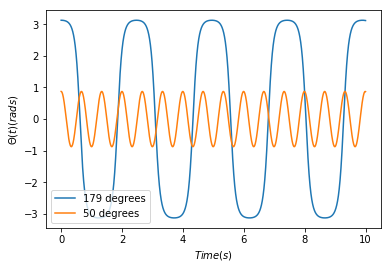

In [30]:
# Global constants
g = 9.81
l = 0.1

# Function definitions
def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return np.array([ftheta,fomega],float)

def pendulum_generator(f,n,r0,interval,steps,label,*args):
    (t1,t2)=interval
    pendulum = solve_coupled(f,n,r0,(t1,t2),steps, order=4,*args)
    time = []
    theta = []
    for i in range(len(pendulum)):
        time.append(pendulum[i][0])
        theta.append(pendulum[i][1])
    

    # Pendulum plotting
    plt.plot(time,theta,label = label)
    plt.xlabel("$Time(s)$")
    plt.ylabel("$\Theta(t) (rads)$")
    return None

# Constant Block
r0 = [math.radians(179.),0.]
n = 2 # Number of dependent variables
t1 = 0 # Initial time
t2 = 10 # Final time
steps = 10000 # Number of steps

# Pendulum data generation
pendulum_generator(f,n,r0,(t1,t2),steps,"179 degrees")

r0 = [math.radians(50.),0.]
pendulum_generator(f,n,r0,(t1,t2),steps,"50 degrees")


plt.legend(loc='best')
plt.show()

# Exercise 8.5

## Introduction

In the previous exercise, the pendulum was assumed to have been let go of, and only subject to the forces of gravity and the string. However, it is entirely possible another outside force could be exerted upon the string. In this instance, it is a horizontal force of a small size. It is precisely defined as:
$$\frac{d^{2}\theta }{dt^{2}} = - \frac{g}{l} \sin(\theta)+C\cos(\theta)\sin(\Omega t)$$
Where C and $\Omega$ are constants

### Part a

In [10]:
C = 2
OMEGA = 5

# Function definitions
def f(t,r):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(OMEGA*t)
    return np.array([ftheta,fomega],float)

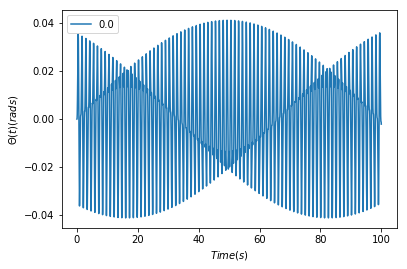

In [11]:
# Constant Block
r0 = [math.radians(0.),0.]
n = 2 # Number of dependent variables
t1 = 0 # Initial time
t2 = 100 # Final time
steps = 10000 # Number of steps

# Pendulum data generation
pendulum_generator(f,n,r0,(t1,t2),steps)
plt.legend(loc='best')
plt.show()

### Part b

0.0
1.11111111111
2.22222222222
3.33333333333
4.44444444444
5.55555555556
6.66666666667
7.77777777778
8.88888888889
10.0


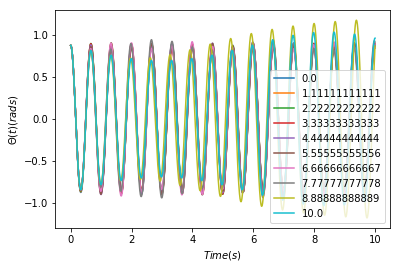

In [36]:
C = 2
OMEGA = np.linspace(0,10,10)

def f_OMEGA (t,r,OMEGA):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(OMEGA*t)
    return np.array([ftheta,fomega],float)

for o in OMEGA:
    print(o)
    pendulum_generator(f_OMEGA,n,r0,(t1,t2),steps,o,o)
    
plt.legend(loc='best')
plt.show()